# Stikanje & preurejanje razpredelnic

Spodaj je pregled naprednejših metod, ki jih ponuja knjižnica Pandas. Vsaka od naštetih metod ponuja še cel kup dodatnih možnosti, ki so natančno opisane v [uradni dokumentaciji](http://pandas.pydata.org/pandas-docs/stable/). Z branjem dokumentacije se vam seveda najbolj splača začeti pri [uvodih](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).

### Predpriprava

In [2]:
# naložimo paket
import pandas as pd

# naložimo razpredelnice, s katero bomo delali
filmi = pd.read_csv('../../ap-3-git-in-normalizacija-tabel/predavanja/filmi.csv', index_col='id')
zanri = pd.read_csv('../../ap-3-git-in-normalizacija-tabel/predavanja/zanri.csv')
osebe = pd.read_csv('../../ap-3-git-in-normalizacija-tabel/predavanja/osebe.csv', index_col='id')
vloge = pd.read_csv('../../ap-3-git-in-normalizacija-tabel/predavanja/vloge.csv')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 16 vrstic in stolpcev
pd.options.display.max_rows = 15
pd.options.display.max_columns = 16

# vključimo risanje grafov (če stvari začnejo delati počasneje, izklopimo možnost inline)
%matplotlib inline

In [3]:
filmi

,naslov,leto,dolzina,ocena,opis
id,,,,,
111161,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...
468569,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
1375666,Inception,2010,148,8.8,"A thief, who steals corporate secrets through ..."
137523,Fight Club,1999,139,8.8,"An insomniac office worker, looking for a way ..."
110912,Pulp Fiction,1994,154,8.9,"The lives of two mob hit men, a boxer, a gangs..."
109830,Forrest Gump,1994,142,8.8,"Forrest Gump, while not intelligent, has accid..."
120737,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.8,A meek Hobbit from the Shire and eight compani...
...,...,...,...,...,...
91419,Little Shop of Horrors,1986,94,6.9,A nerdy florist finds his chance for success a...


In [4]:
osebe

,ime
id,
1104,Frank Darabont
209,Tim Robbins
151,Morgan Freeman
348409,Bob Gunton
6669,William Sadler
634240,Christopher Nolan
288,Christian Bale
...,...
650945,Roxana Ortega


In [5]:
vloge

,film,oseba,vloga
0,111161,1104,reziser
1,111161,209,igralec
2,111161,151,igralec
3,111161,348409,igralec
4,111161,6669,igralec
5,468569,634240,reziser
6,468569,288,igralec
...,...,...,...
12788,267626,824220,igralec
12789,267626,131235,igralec


Razpredelnice združujemo s funkcijo `merge`, ki vrne razpredelnico vnosov iz obeh tabel, pri katerih se vsi istoimenski podatki ujemajo.

In [6]:
vloge[vloge['film'] == 111161]

,film,oseba,vloga
0,111161,1104,reziser
1,111161,209,igralec
2,111161,151,igralec
3,111161,348409,igralec
4,111161,6669,igralec


In [7]:
zanri[zanri['film'] == 111161]

,film,zanr
0,111161,Crime
1,111161,Drama


In [8]:
pd.merge(vloge, zanri)

,film,oseba,vloga,zanr
0,111161,1104,reziser,Crime
1,111161,1104,reziser,Drama
2,111161,209,igralec,Crime
3,111161,209,igralec,Drama
4,111161,151,igralec,Crime
5,111161,151,igralec,Drama
6,111161,348409,igralec,Crime
...,...,...,...,...
33267,53779,52,igralec,Drama
33268,53779,1179,igralec,Comedy


Poglejmo, kateri igralec je igral v največ komedijah.

In [9]:
zanri_vlog = pd.merge(vloge, zanri)
zanri_vlog[
    (zanri_vlog['zanr'] == 'Comedy') & (zanri_vlog['vloga'] == 'igralec')
].groupby(
    'oseba'
).size().sort_values()

oseba
178176     1
515207     1
515116     1
513281     1
507659     1
507644     1
505971     1
          ..
2071      17
136797    18
120       19
139       19
1774      20
5562      20
1191      26
dtype: int64

In [10]:
osebe.loc[1191]

ime    Adam Sandler
Name: 1191, dtype: object

In [11]:
filmi_osebe = pd.merge(zanri, vloge[vloge['vloga'] == 'igralec']).join(
    filmi, on='film'
).groupby(
    'oseba'
)

In [12]:
filmi_osebe.mean()[filmi_osebe.size() > 3].sort_values('ocena').join(osebe)

,film,leto,dolzina,ocena,ime
oseba,,,,,
177639,514570.285714,2005.428571,89.00,3.957143,Jennifer Coolidge
167649,702908.500000,2005.000000,107.50,4.150000,Kim Coates
341176,335671.000000,2002.500000,85.50,4.200000,Eddie Griffin
933727,346262.000000,2006.000000,97.00,4.450000,Lambert Wilson
63571,429567.500000,2005.500000,100.00,4.950000,Kate Beahan
2443758,1523765.500000,2012.000000,134.00,4.950000,Nicola Peltz
1210124,1436640.600000,2010.600000,118.40,4.980000,Taylor Lautner
...,...,...,...,...,...
1663,1087483.800000,1997.200000,125.00,8.440000,Paul Reiser


V osnovi vsebuje združena razpredelnica le tiste vnose, ki se pojavijo v obeh tabelah. Temu principu pravimo notranji stik (_inner join_). Lahko pa se odločimo, da izberemo tudi tiste vnose, ki imajo podatke le v levi tabeli (_left join_), le v desni tabeli (_right join_) ali v vsaj eni tabeli (_outer join_). Če v eni tabeli ni vnosov, bodo v združeni tabeli označene manjkajoče vrednosti. Ker smo v našem primeru podatke jemali iz IMDBja, kjer so za vsak film določeni tako žanri kot vloge, do razlik ne pride.

Če želimo razpredelnice združevati po ključih, namesto `merge` uporabimo `join` (ki v ozadju uporablja `merge`).

In [13]:
zanri.join(filmi, on='film')

,film,zanr,naslov,leto,dolzina,ocena,opis
0,111161,Crime,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...
1,111161,Drama,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...
2,468569,Action,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
3,468569,Crime,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
4,468569,Drama,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
5,1375666,Action,Inception,2010,148,8.8,"A thief, who steals corporate secrets through ..."
6,1375666,Adventure,Inception,2010,148,8.8,"A thief, who steals corporate secrets through ..."
...,...,...,...,...,...,...,...
6487,2390361,Drama,Enough Said,2013,93,7.1,A divorced woman who decides to pursue the man...
6488,2390361,Romance,Enough Said,2013,93,7.1,A divorced woman who decides to pursue the man...


Enako bi lahko dosegli s funkcijo `merge`, vendar bi poprej razpredelnici `filmi` morali stolpec `id` iz indeksa pretvoriti v običajni stolpec. Ker razpredelnici nimata enako poimenovanih stolpcev, moramo posebej povedati, katere leve stolpce združimo s katerimi desnimi.

In [14]:
pd.merge(zanri, filmi.reset_index(), left_on='film', right_on='id')

,film,zanr,id,naslov,leto,dolzina,ocena,opis
0,111161,Crime,111161,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...
1,111161,Drama,111161,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...
2,468569,Action,468569,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
3,468569,Crime,468569,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
4,468569,Drama,468569,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...
5,1375666,Action,1375666,Inception,2010,148,8.8,"A thief, who steals corporate secrets through ..."
6,1375666,Adventure,1375666,Inception,2010,148,8.8,"A thief, who steals corporate secrets through ..."
...,...,...,...,...,...,...,...,...
6487,2390361,Drama,2390361,Enough Said,2013,93,7.1,A divorced woman who decides to pursue the man...
6488,2390361,Romance,2390361,Enough Said,2013,93,7.1,A divorced woman who decides to pursue the man...


Z združeno tabelo lahko izračunamo tudi povprečno oceno glede na žanr, ali pa priljubljenost žanrov.

In [15]:
zanri.join(filmi, on='film').groupby('zanr').mean().sort_values('ocena')

,film,leto,dolzina,ocena
zanr,,,,
Horror,727550.876033,2001.123967,102.314050,6.519008
Action,732316.061333,2002.977333,115.178667,6.642533
Sci-Fi,752543.134948,2002.352941,113.740484,6.699654
Comedy,698569.361345,2001.621849,103.563025,6.730492
Fantasy,620309.000000,2000.276753,111.594096,6.750185
Family,494848.750000,1996.585366,104.286585,6.825610
Romance,724389.837989,2001.949721,111.888268,6.855307
...,...,...,...,...
Musical,412945.363636,1992.772727,126.000000,7.250000


Poglejmo, kako popularni so bili posamezni žanri skozi desetletja. Najprej vsakemu filmu dodajmo še stolpec z desetletjem.

In [16]:
filmi['desetletje'] = 10 * (filmi['leto'] // 10)

Nato poglejmo, koliko je bilo filmov posameznega žanra v vsakem desetletju.

In [17]:
zastopanost_zanrov = zanri\
    .join(filmi, on='film')\
    .groupby(['desetletje', 'zanr'])\
    .size()
zastopanost_zanrov

desetletje  zanr     
1920        Action         1
            Adventure      2
            Comedy         3
            Drama          3
            Family         1
            Fantasy        1
            Horror         1
                        ... 
2010        Mystery       72
            Romance      107
            Sci-Fi        96
            Sport         10
            Thriller     131
            War            8
            Western        4
dtype: int64

Ker smo združevali po več lastnostih, smo dobili stolpec s hierarhičnim indeksom. Tega lahko pretvorimo v matriko z metodo `.unstack`.

In [18]:
matrika_zastopanosti = zastopanost_zanrov.unstack()
matrika_zastopanosti

zanr,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
desetletje,,,,,,,,,,,,,,,,,
1920,1,2,NaN,NaN,3,NaN,3,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1930,NaN,2,1,NaN,4,1,5,3,...,NaN,1,3,NaN,NaN,NaN,NaN,NaN
1940,NaN,1,4,NaN,3,4,13,5,...,NaN,5,3,NaN,NaN,2,2,1
1950,2,9,5,NaN,4,11,22,4,...,1,4,6,1,NaN,6,2,2
1960,12,18,3,5,10,7,30,4,...,2,6,5,2,1,10,1,7
1970,13,16,2,5,15,14,38,1,...,3,6,4,10,2,13,4,2
1980,54,52,11,10,68,31,68,16,...,2,9,17,29,5,24,6,1
1990,138,92,22,26,155,107,213,34,...,1,45,55,48,9,83,6,3
2000,277,233,62,56,329,195,457,65,...,10,112,158,102,25,185,17,3


Ker nas zanima le popularnost žanra v posameznem desetletju, želimo za vsak stolpec izračunati razmerje števila filmov danega žanra glede na število vseh filmov. To storimo s pomočjo metode `.apply`, ki v dani razpredelnici dano funkcijo uporabi na vsaki vrstici ali stolpcu (če dodamo možnost `axis=1`). Če bi želeli funkcijo uporabiti na vsakem elementu stolpca, bi namesto `.apply` uporabili `.map`.

In [19]:
matrika_popularnosti = matrika_zastopanosti.apply(lambda st: st / st.sum(), axis=1)
matrika_popularnosti

zanr,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
desetletje,,,,,,,,,,,,,,,,,
1920,0.076923,0.153846,NaN,NaN,0.230769,NaN,0.230769,0.076923,...,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN
1930,NaN,0.080000,0.040000,NaN,0.160000,0.040000,0.200000,0.120000,...,NaN,0.040000,0.120000,NaN,NaN,NaN,NaN,NaN
1940,NaN,0.018519,0.074074,NaN,0.055556,0.074074,0.240741,0.092593,...,NaN,0.092593,0.055556,NaN,NaN,0.037037,0.037037,0.018519
1950,0.022472,0.101124,0.056180,NaN,0.044944,0.123596,0.247191,0.044944,...,0.011236,0.044944,0.067416,0.011236,NaN,0.067416,0.022472,0.022472
1960,0.092308,0.138462,0.023077,0.038462,0.076923,0.053846,0.230769,0.030769,...,0.015385,0.046154,0.038462,0.015385,0.007692,0.076923,0.007692,0.053846
1970,0.078313,0.096386,0.012048,0.030120,0.090361,0.084337,0.228916,0.006024,...,0.018072,0.036145,0.024096,0.060241,0.012048,0.078313,0.024096,0.012048
1980,0.116129,0.111828,0.023656,0.021505,0.146237,0.066667,0.146237,0.034409,...,0.004301,0.019355,0.036559,0.062366,0.010753,0.051613,0.012903,0.002151
1990,0.120629,0.080420,0.019231,0.022727,0.135490,0.093531,0.186189,0.029720,...,0.000874,0.039336,0.048077,0.041958,0.007867,0.072552,0.005245,0.002622
2000,0.109055,0.091732,0.024409,0.022047,0.129528,0.076772,0.179921,0.025591,...,0.003937,0.044094,0.062205,0.040157,0.009843,0.072835,0.006693,0.001181


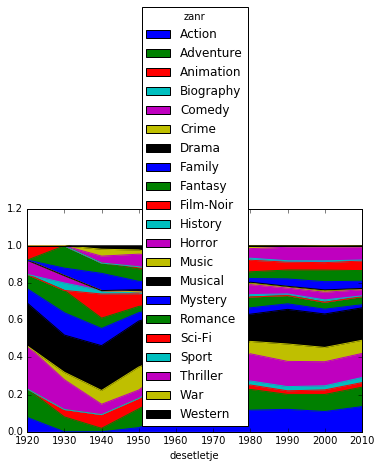

In [20]:
matrika_popularnosti.plot(kind='area')

Razpredelnico včasih želimo stakniti samo s seboj. Ugotovimo, v katerih filmih je igral njihov režiser.

In [21]:
igralci = vloge[vloge['vloga'] == 'igralec']
igralci

,film,oseba,vloga
1,111161,209,igralec
2,111161,151,igralec
3,111161,348409,igralec
4,111161,6669,igralec
6,468569,288,igralec
7,468569,5132,igralec
8,468569,1173,igralec
...,...,...,...
12787,267626,819874,igralec
12788,267626,824220,igralec


In [22]:
reziserji = vloge[vloge['vloga'] == 'reziser']
reziserji

,film,oseba,vloga
0,111161,1104,reziser
5,468569,634240,reziser
10,1375666,634240,reziser
15,137523,399,reziser
20,110912,233,reziser
25,109830,709,reziser
30,120737,1392,reziser
...,...,...,...
12760,91419,568,reziser
12765,1583420,158,reziser


In [23]:
vsestranski = pd.merge(igralci, reziserji, on=['film', 'oseba'])
vsestranski

,film,oseba,vloga_x,vloga_y
0,361748,744834,igralec,reziser
1,112573,154,igralec,reziser
2,1205489,142,igralec,reziser
3,405159,142,igralec,reziser
4,1637725,532235,igralec,reziser
5,1024648,255,igralec,reziser
6,118799,905,igralec,reziser
...,...,...,...,...
83,3007512,128,igralec,reziser
84,17925,36,igralec,reziser


In [24]:
vsestranski.join(filmi, on='film').join(osebe, on='oseba')

,film,oseba,vloga_x,vloga_y,naslov,leto,dolzina,ocena,opis,desetletje,ime
0,361748,744834,igralec,reziser,Inglourious Basterds,2009,153,8.3,"In Nazi-occupied France during World War II, a...",2000,Eli Roth
1,112573,154,igralec,reziser,Braveheart,1995,178,8.4,When his secret bride is executed for assaulti...,1990,Mel Gibson
2,1205489,142,igralec,reziser,Gran Torino,2008,116,8.2,Disgruntled Korean War veteran Walt Kowalski s...,2000,Clint Eastwood
3,405159,142,igralec,reziser,Million Dollar Baby,2004,132,8.1,A determined woman works with a hardened boxin...,2000,Clint Eastwood
4,1637725,532235,igralec,reziser,Ted,2012,106,7.0,"John Bennett, a man whose childhood wish of br...",2010,Seth MacFarlane
5,1024648,255,igralec,reziser,Argo,2012,120,7.7,Acting under the cover of a Hollywood producer...,2010,Ben Affleck
6,118799,905,igralec,reziser,Life Is Beautiful,1997,116,8.6,When an open-minded Jewish librarian and his s...,1990,Roberto Benigni
...,...,...,...,...,...,...,...,...,...,...,...
83,3007512,128,igralec,reziser,The Water Diviner,2014,111,7.1,An Australian man travels to Turkey after the ...,2010,Russell Crowe
84,17925,36,igralec,reziser,The General,1926,67,8.2,When Union spies steal an engineer's beloved l...,1920,Buster Keaton
